In [138]:
import os
import pandas as pd

INPUT_FILE = "winequality-red.csv"

def load_wine_data(file=INPUT_FILE, header=True):
    csv_path = os.path.join("", file)
    if header:
        return pd.read_csv(csv_path)
    else:
        return pd.read_csv(csv_path, header=None)


data = load_wine_data(INPUT_FILE)
data.head()

In [2]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
fixed acidity           1599 non-null float64
volatile acidity        1599 non-null float64
citric acid             1599 non-null float64
residual sugar          1599 non-null float64
chlorides               1599 non-null float64
free sulfur dioxide     1599 non-null float64
total sulfur dioxide    1599 non-null float64
density                 1599 non-null float64
pH                      1599 non-null float64
sulphates               1599 non-null float64
alcohol                 1599 non-null float64
quality                 1599 non-null int64
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [3]:
data.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


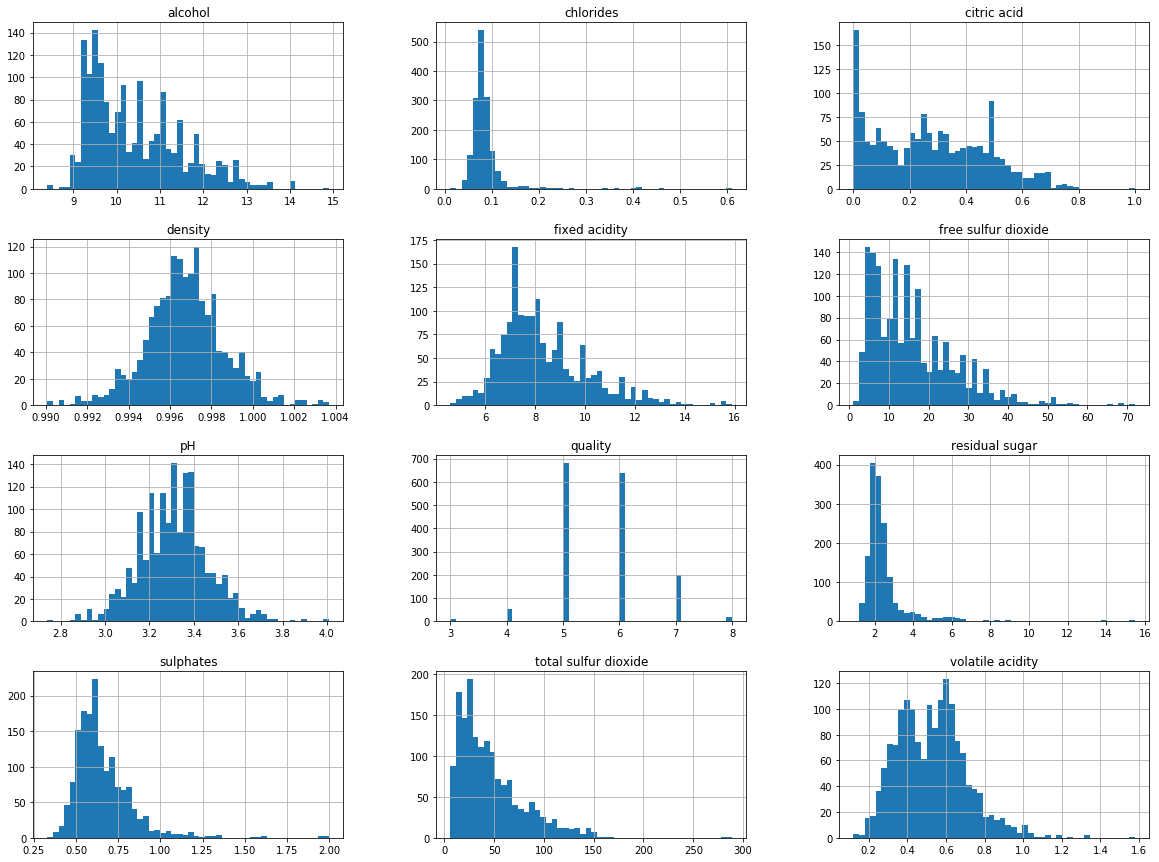

In [4]:
%matplotlib inline
import matplotlib.pyplot as plt
data.hist(bins=50, figsize=(20,15))
plt.show()

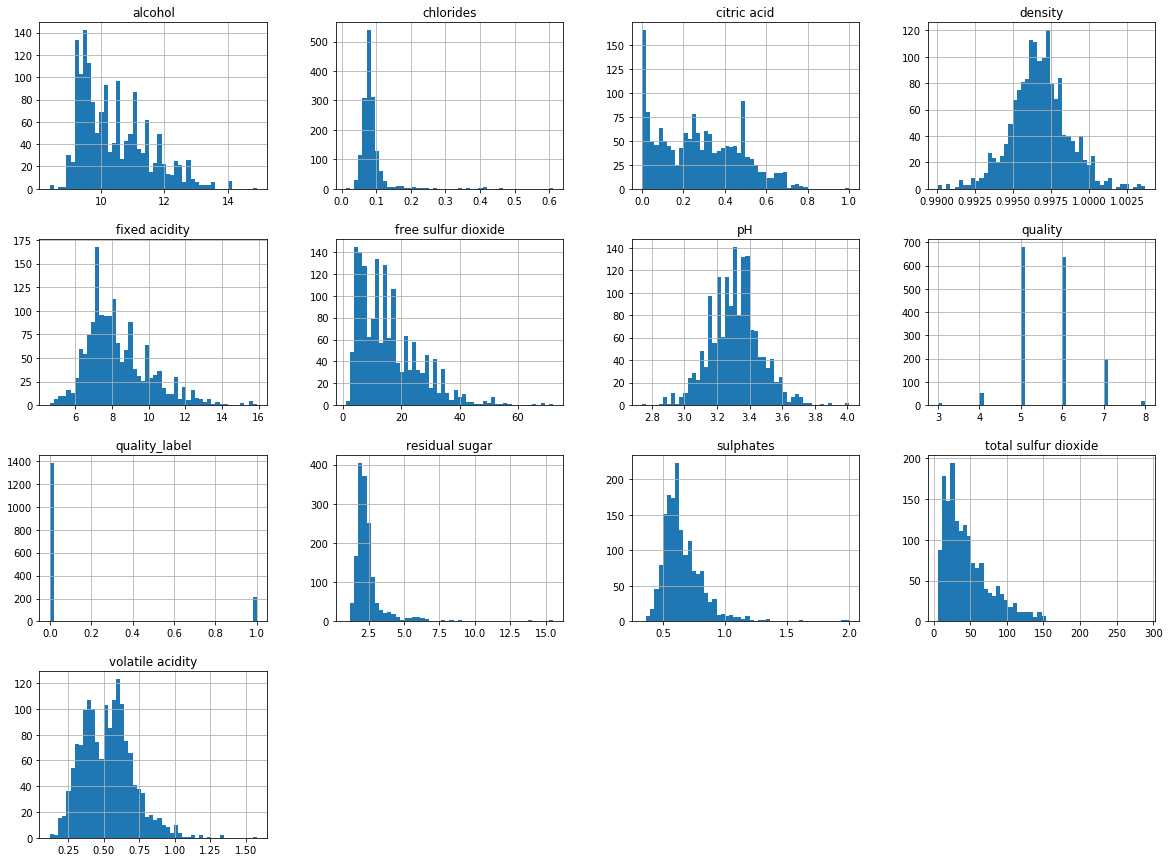

In [15]:
import numpy as np
data["quality_label"] = np.floor(data["quality"] / 7.0)

%matplotlib inline
import matplotlib.pyplot as plt
data.hist(bins=50, figsize=(20,15))
plt.show()


In [22]:
from sklearn .model_selection import StratifiedShuffleSplit
split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_index, test_index in split.split(data, data["quality_label"]):
    strat_train_set = data.loc[train_index]
    strat_test_set = data.loc[test_index]

data["quality_label"].value_counts() / len(data)

0.0    0.86429
1.0    0.13571
Name: quality_label, dtype: float64

In [23]:
strat_train_set["quality_label"].value_counts() / len(strat_train_set)

0.0    0.863956
1.0    0.136044
Name: quality_label, dtype: float64

In [24]:
strat_test_set["quality_label"].value_counts() / len(strat_test_set)

0.0    0.865625
1.0    0.134375
Name: quality_label, dtype: float64

In [25]:
data_copy = data.copy()

In [32]:
for set in (strat_train_set, strat_test_set):
    set.drop(["quality_label"], axis=1, inplace=True)


In [38]:
corr_data = data.corr()
corr_data

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,quality_label
fixed acidity,1.000000,-0.256131,0.671703,0.114777,0.093705,-0.153794,-0.113181,0.668047,-0.682978,0.183006,-0.061668,0.124052,0.120061
volatile acidity,-0.256131,1.000000,-0.552496,0.001918,0.061298,-0.010504,0.076470,0.022026,0.234937,-0.260987,-0.202288,-0.390558,-0.270712
citric acid,0.671703,-0.552496,1.000000,0.143577,0.203823,-0.060978,0.035533,0.364947,-0.541904,0.312770,0.109903,0.226373,0.214716
residual sugar,0.114777,0.001918,0.143577,1.000000,0.055610,0.187049,0.203028,0.355283,-0.085652,0.005527,0.042075,0.013732,0.047779
chlorides,0.093705,0.061298,0.203823,0.055610,1.000000,0.005562,0.047400,0.200632,-0.265026,0.371260,-0.221141,-0.128907,-0.097308
free sulfur dioxide,-0.153794,-0.010504,-0.060978,0.187049,0.005562,1.000000,0.667666,-0.021946,0.070377,0.051658,-0.069408,-0.050656,-0.071747
total sulfur dioxide,-0.113181,0.076470,0.035533,0.203028,0.047400,0.667666,1.000000,0.071269,-0.066495,0.042947,-0.205654,-0.185100,-0.139517
density,0.668047,0.022026,0.364947,0.355283,0.200632,-0.021946,0.071269,1.000000,-0.341699,0.148506,-0.496180,-0.174919,-0.150460
pH,-0.682978,0.234937,-0.541904,-0.085652,-0.265026,0.070377,-0.066495,-0.341699,1.000000,-0.196648,0.205633,-0.057731,-0.057283
sulphates,0.183006,-0.260987,0.312770,0.005527,0.371260,0.051658,0.042947,0.148506,-0.196648,1.000000,0.093595,0.251397,0.199485


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x10e2db3c8>,
      dtype=object)

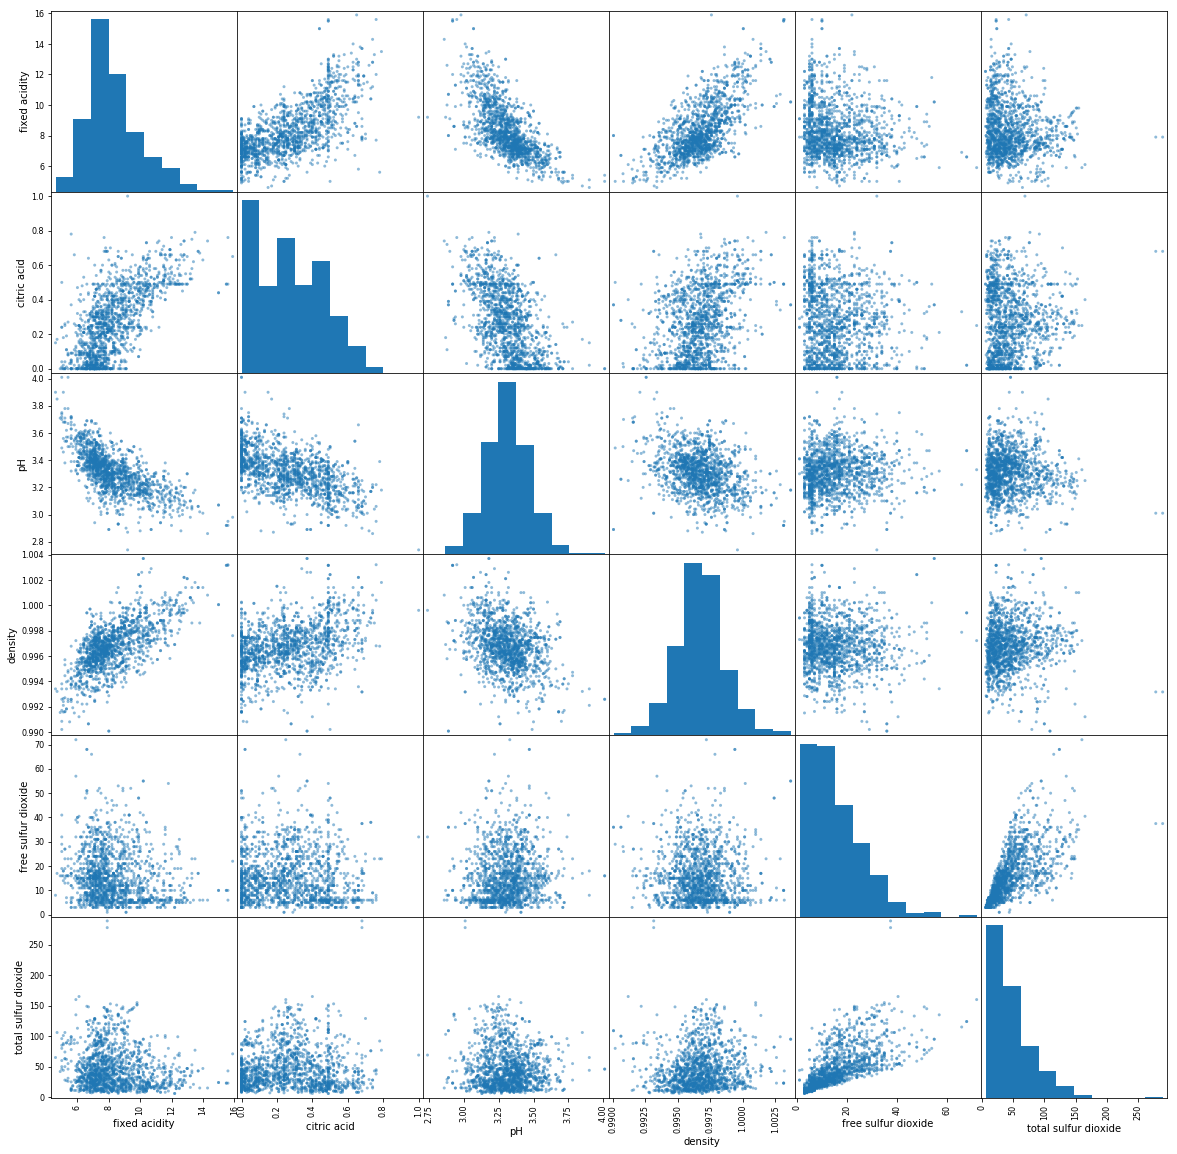

In [46]:
from pandas.plotting import scatter_matrix

attributes = ["fixed acidity", "citric acid", "pH", "density", "free sulfur dioxide", "total sulfur dioxide"]
scatter_matrix(data[attributes], figsize=(20,20))

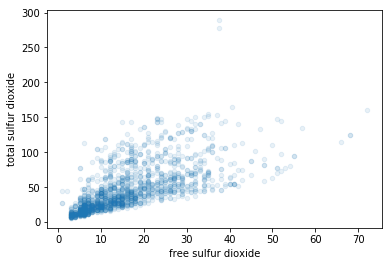

In [48]:
data.plot(kind="scatter", x="free sulfur dioxide", y="total sulfur dioxide", alpha=0.1)

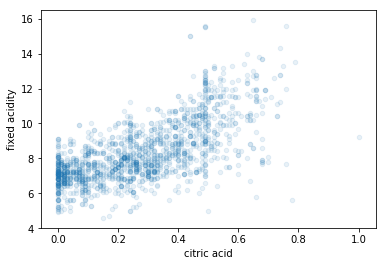

In [57]:
data.plot(kind="scatter", y="fixed acidity", x="citric acid", alpha=0.1)

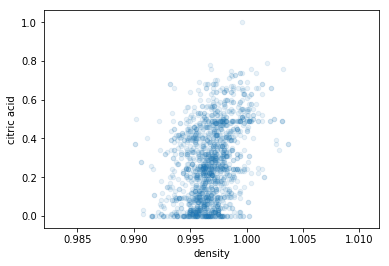

In [53]:
data.plot(kind="scatter", x="density", y="citric acid", alpha=0.1)

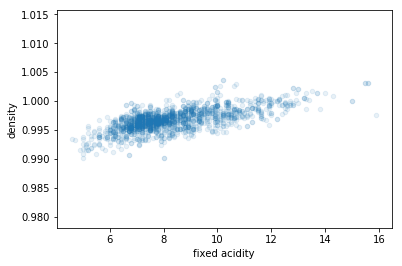

In [56]:
data.plot(kind="scatter", y="density", x="fixed acidity", alpha=0.1)

In [62]:
data["sulfur_dioxide"] = data["free sulfur dioxide"] / data["total sulfur dioxide"]

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1108517b8>,
      dtype=object)

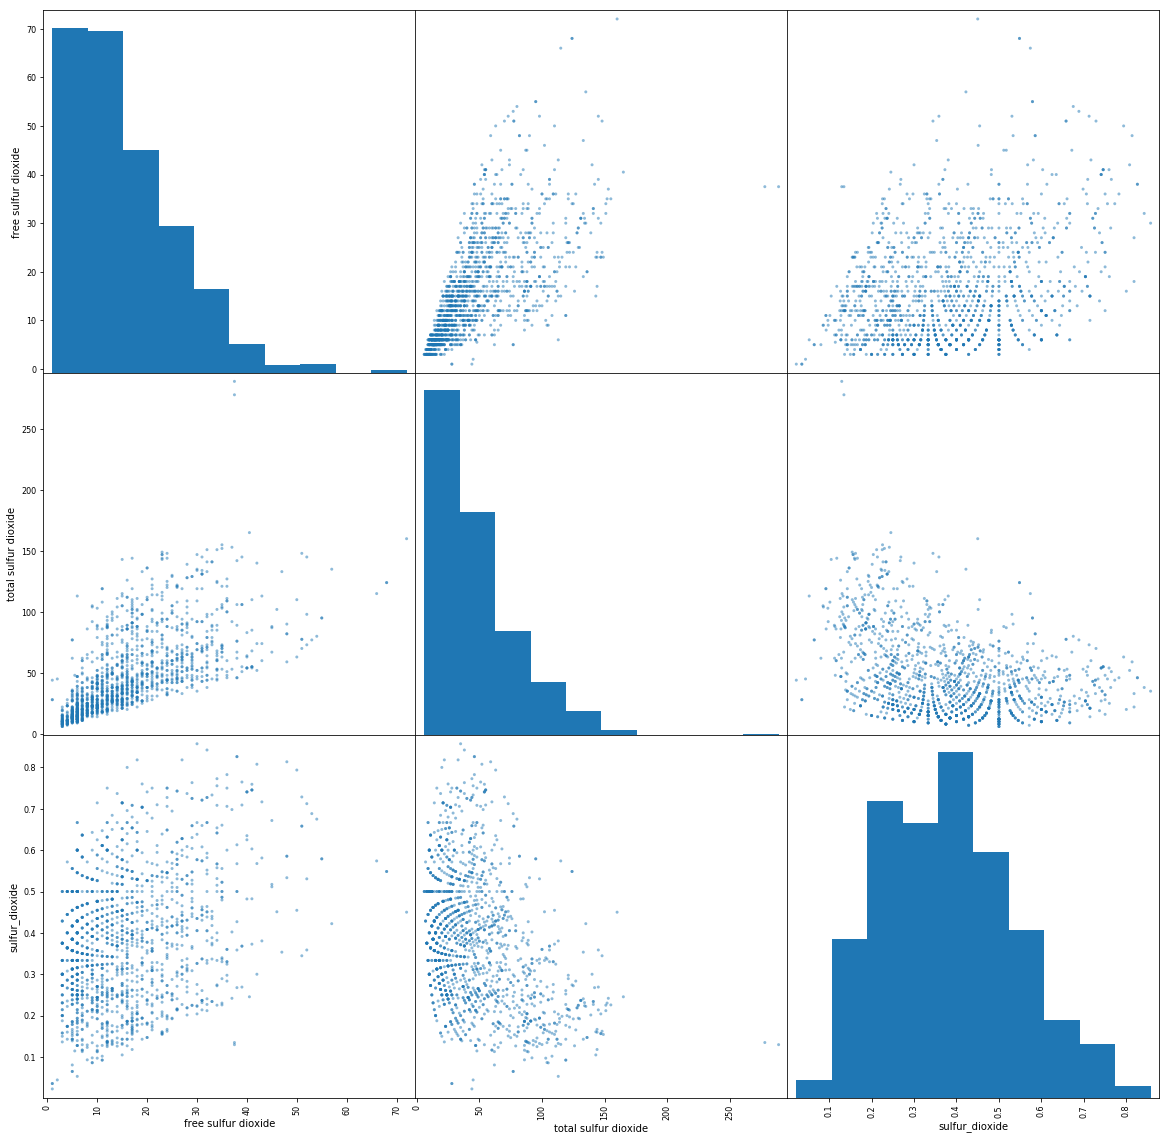

In [61]:
from pandas.plotting import scatter_matrix

attributes = ["free sulfur dioxide", "total sulfur dioxide", "sulfur_dioxide"]
scatter_matrix(data[attributes], figsize=(20,20))

In [60]:
corr_data = data.corr()
corr_data

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,quality_label,sulfur_dioxide
fixed acidity,1.000000,-0.256131,0.671703,0.114777,0.093705,-0.153794,-0.113181,0.668047,-0.682978,0.183006,-0.061668,0.124052,0.120061,-0.130812
volatile acidity,-0.256131,1.000000,-0.552496,0.001918,0.061298,-0.010504,0.076470,0.022026,0.234937,-0.260987,-0.202288,-0.390558,-0.270712,-0.072619
citric acid,0.671703,-0.552496,1.000000,0.143577,0.203823,-0.060978,0.035533,0.364947,-0.541904,0.312770,0.109903,0.226373,0.214716,-0.166939
residual sugar,0.114777,0.001918,0.143577,1.000000,0.055610,0.187049,0.203028,0.355283,-0.085652,0.005527,0.042075,0.013732,0.047779,-0.070626
chlorides,0.093705,0.061298,0.203823,0.055610,1.000000,0.005562,0.047400,0.200632,-0.265026,0.371260,-0.221141,-0.128907,-0.097308,-0.105156
free sulfur dioxide,-0.153794,-0.010504,-0.060978,0.187049,0.005562,1.000000,0.667666,-0.021946,0.070377,0.051658,-0.069408,-0.050656,-0.071747,0.327241
total sulfur dioxide,-0.113181,0.076470,0.035533,0.203028,0.047400,0.667666,1.000000,0.071269,-0.066495,0.042947,-0.205654,-0.185100,-0.139517,-0.371435
density,0.668047,0.022026,0.364947,0.355283,0.200632,-0.021946,0.071269,1.000000,-0.341699,0.148506,-0.496180,-0.174919,-0.150460,-0.264980
pH,-0.682978,0.234937,-0.541904,-0.085652,-0.265026,0.070377,-0.066495,-0.341699,1.000000,-0.196648,0.205633,-0.057731,-0.057283,0.184895
sulphates,0.183006,-0.260987,0.312770,0.005527,0.371260,0.051658,0.042947,0.148506,-0.196648,1.000000,0.093595,0.251397,0.199485,-0.010459


In [67]:
data = data.drop("total sulfur dioxide", axis=1)
data = data.drop("free sulfur dioxide", axis=1)
from sklearn .model_selection import StratifiedShuffleSplit
split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_index, test_index in split.split(data, data["quality_label"]):
    strat_train_set = data.loc[train_index]
    strat_test_set = data.loc[test_index]


In [69]:
label = strat_train_set["quality"].copy()
data = strat_train_set.drop("quality_label", axis=1)
test_label = strat_test_set["quality"].copy()
test_data = strat_test_set.drop("quality_label", axis=1)

In [72]:
from sklearn.preprocessing import Imputer
imputer = Imputer(strategy="median")
imputer.fit(data)

Imputer(axis=0, copy=True, missing_values='NaN', strategy='median', verbose=0)

In [73]:
pre_tr_data = data.copy()

In [98]:
data_x = imputer.transform(data)

In [99]:
data = pd.DataFrame(data_x, columns=data.columns)


In [100]:
from sklearn.preprocessing import StandardScaler

scalar = StandardScaler()
scalar.fit(data)
data = pd.DataFrame(scalar.transform(data), columns=data.columns)

In [103]:
pre_tr_test_data = test_data.copy()

In [104]:
test_data = pd.DataFrame(imputer.transform(test_data), columns=test_data.columns)

In [112]:
test_data = pd.DataFrame(scalar.transform(test_data), columns=test_data.columns)

In [110]:
data.to_csv("data.csv", encoding='utf-8', index=False)
test_data.to_csv("test_data.csv", encoding='utf-8', index=False)
label.to_csv("label.csv", encoding='utf-8', index=False)
test_label.to_csv("test_label.csv", encoding='utf-8', index=False)

In [149]:
data = load_wine_data("data.csv")
data = data[list(data)].values

test_data = load_wine_data("test_data.csv")
test_data = test_data[list(test_data)].values

label = load_wine_data("label.csv", header=False)
test_label = load_wine_data("test_label.csv", header=False)

label = label.values
test_label = test_label.values

In [209]:
#Linear Regression

from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(data, label)

predicted_test_label = lin_reg.predict(test_data)
y = np.floor(test_label / 7.0)
y_dash = np.floor(predicted_test_label / 7.0)
print("Accuracy on test data", sum(y == y_dash) * 100.0 / len(test_label), "%")



from sklearn.metrics import mean_squared_error

predicted_label = lin_reg.predict(data)
lin_mse = mean_squared_error(label, predicted_label)
lin_rmse = np.sqrt(lin_mse)
print("RMSE on training data", lin_rmse)


#Saving the model
from sklearn.externals import joblib

LINEAR_REG_MODEL_NAME = "linear_reg_model.pk1"
joblib.dump(lin_reg, LINEAR_REG_MODEL_NAME)


# Cross Validation
lin_reg = joblib.load(LINEAR_REG_MODEL_NAME)

from sklearn.model_selection import cross_val_score

scores = cross_val_score(lin_reg, data, label, scoring="neg_mean_squared_error", cv=10)
rmse_scores = np.sqrt(-scores)
print("Mean", scores.mean())
print("SD", scores.std())


Accuracy on test data [96.5625] %
RMSE on training data 5.136413203283223e-16
Mean -1.0849918934699933e-30
SD 8.130159419332646e-31


In [210]:
# Decision tree Regression

from sklearn.tree import DecisionTreeRegressor

tree_reg = DecisionTreeRegressor()
tree_reg.fit(data, label)

predicted_test_label = tree_reg.predict(test_data)
y = np.floor(test_label / 7.0).flatten()
y_dash = np.floor(predicted_test_label / 7.0).flatten()
print("Accuracy on test data", sum(y == y_dash) * 100.0 / len(test_label), "%")


from sklearn.metrics import mean_squared_error

predicted_label = tree_reg.predict(data)
tree_mse = mean_squared_error(label, predicted_label)
tree_rmse = np.sqrt(tree_mse)
print("RMSE on training data", tree_rmse)


#Saving the model
from sklearn.externals import joblib

TREE_MODEL_NAME = "tree_reg_model.pk1"
joblib.dump(tree_reg, TREE_MODEL_NAME)


# Cross Validation
tree_reg = joblib.load(TREE_MODEL_NAME)

from sklearn.model_selection import cross_val_score

scores = cross_val_score(tree_reg, data, label, scoring="neg_mean_squared_error", cv=10)
rmse_scores = np.sqrt(-scores)
print("Mean", scores.mean())
print("SD", scores.std())

Accuracy on test data 100.0 %
RMSE on training data 0.0
Mean 0.0
SD 0.0
